In [1]:
# Made by Naman Singh
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load the dataset
data_address="/Users/naman/Downloads/tesla_price_dataset.xlsx"

# --- 1) Load the Excel file, treating the first row as column names (ignored as data) ---
dataset_file = pd.read_excel(data_address, header=0)  # header row = column names
#drop rows with missing values:
dataset_file = dataset_file.dropna()
#convert to numpy array
values = dataset_file.to_numpy()


In [3]:
# Split into features and target as numpy arrays
# x: all columns except the last (2D)
# y: the last column only (1D)
x = values[:, :-1] #take all rows and all columns except column at index -1
y = values[:, -1] #take all rows and column at index -1
#free some space in ram
del values
del dataset_file

In [4]:
#split between training and testing (80-20)
size=len(y)
split=int(0.8*size)
#first split elements are for training
x_train=x[:split] #take rows from 0 to split-1 and all columns
y_train=y[:split]
x_test=x[split:] #take rows from split to end and all columns
y_test=y[split:]
print("Details of the dataset are as follows:\n")
print(f"number of samples for training are {len(y_train)}")
print()
print(f"number of samples for testing are {len(y_test)}")
#free some space in ram
del x
del y


Details of the dataset are as follows:

number of samples for training are 7793

number of samples for testing are 1949


In [5]:
# more efficient approach
def compute_gradient(x,y,w,b,lambda_=1):
    #dj_dw is a 1D vector of size n
    m,n=x.shape  # m is number of examples, n is number of features
    f_wb=np.dot(x,w)+b # (m,n) dot (n,)= (m,) 1D array
    error=f_wb-y #1 D array of size m
    dj_dw=np.dot(x.T,error)/m  #x.T is a n*m matrix (T-> transpose)  (n,m) dot (m,) = (n,)
    dj_db=np.sum(error)/m
    dj_dw+= (lambda_/m) * w  # Adding regularization term to the gradient
    return dj_dw, dj_db



In [6]:
def cost_fn(x,y,w,b,lambda_=1):
    # x is a mxn matrix
    # w is a vector, size =n
    # y is a vector, size = m
    m,n=x.shape
    sum=0
    f_wb=np.dot(x,w)+b
    cost=np.sum((f_wb-y)**2)/(2*m)  # Mean Squared Error
    # Adding regularization term
    cost+= (np.sum(w**2) * lambda_/(2*m))  # Regularization term
    return cost

In [7]:
def change_parameters(x,y,w,b,a,lambda_=1):
    dj_dw,dj_db=compute_gradient(x,y,w,b,lambda_)
    w=w-a*dj_dw
    b=b-a*dj_db
    return w,b

In [8]:
# code begins


#Normalizing the features
mu=np.mean(x_train,axis=0)
sigma=np.std(x_train,axis=0)
x_train=(x_train-mu)/sigma

m=x_train.shape[0]
n=x_train.shape[1]

# taking initial values as 0 
w=np.zeros(n)
b=0

lambda_=0.5
a=0.05

print(f"cost function at 0 epochs is {cost_fn(x_train,y_train,w,b,lambda_)}")
old=cost_fn(x_train,y_train,w,b,lambda_)
j_history=[old]

flag=0 # the cost fn is continuously decreasing
same=0 # flag to check if cost function is same for 10 iterations
epochs=10000


for i in range(epochs):
    
    w,b=change_parameters(x_train,y_train,w,b,a, lambda_)
    cost=cost_fn(x_train,y_train,w,b, lambda_)
    j_history.append(cost)
    print(f"cost function at {i+1} epochs is {cost}")
    if(cost>old):
        flag=1
        print(f"cost function has started increasing at epoch {i+1}")
        break
    if((old-cost)<1e-5):
            same+=1
            if(same==10):
                print(f"cost function has not changed for 10 iterations, stopping gradient descent at epoch {i+1}")
                break
    else:
         same=0
    old=cost




cost function at 0 epochs is 9871.12484725985
cost function at 1 epochs is 7844.966969406131
cost function at 2 epochs is 6313.119597582037
cost function at 3 epochs is 5144.633227169943
cost function at 4 epochs is 4244.402614617396
cost function at 5 epochs is 3543.236849902739
cost function at 6 epochs is 2990.6920770435922
cost function at 7 epochs is 2549.8971000609145
cost function at 8 epochs is 2193.816705224316
cost function at 9 epochs is 1902.552288738209
cost function at 10 epochs is 1661.3909871710969
cost function at 11 epochs is 1459.3949981186115
cost function at 12 epochs is 1288.3808278319177
cost function at 13 epochs is 1142.1800682407547
cost function at 14 epochs is 1016.1035004753641
cost function at 15 epochs is 906.5520998514256
cost function at 16 epochs is 810.734225107635
cost function at 17 epochs is 726.4596048703307
cost function at 18 epochs is 651.9889073478626
cost function at 19 epochs is 585.9235752969479
cost function at 20 epochs is 527.12486210274

In [9]:
# Is Gradient Descent working properly?
#Test 1
if flag==0:
    print("Cost function is always decreasing as expected")

Cost function is always decreasing as expected


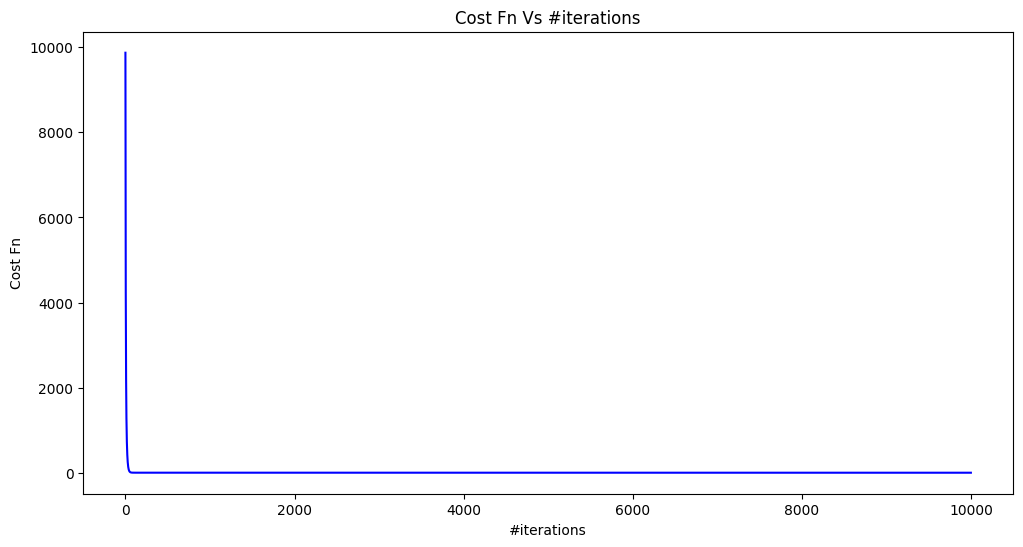

In [10]:

plt.figure(figsize=(12,6))
plt.plot(j_history,c='b')

# Set the title
plt.title("Cost Fn Vs #iterations")
# Set the y-axis label
plt.ylabel('Cost Fn')
# Set the x-axis label
plt.xlabel('#iterations')
plt.show()

In [11]:
# for predicting a new example:
#normalize it using old mu and sigma

x_test=(x_test-mu)/sigma
f_wb=np.dot(x_test,w)+b
error=abs(f_wb - y_test)

#root mean square error
rmse=np.sqrt(np.sum(error**2)/len(y_test))
mae=np.sum(error)/len(y_test)

print(f"Root Mean Square Error on test set is {rmse:.2f}")
print(f"Mean Absolute Error on test set is {mae:.2f}")

Root Mean Square Error on test set is 2.86
Mean Absolute Error on test set is 1.19


In [12]:
#saving all the weights and bias in a text file
from contextlib import redirect_stdout

with open("Result.txt", "w", encoding="utf-8") as f, redirect_stdout(f):
    # Everything printed here goes into Result.txt (old contents are replaced)
    print("Model coded by Naman Singh\n\n")
    print("\nTechnique used: Multivariate Linear Regression + Normalization + Regularization\n")
    print("The results are as follows:\n")
    print()
    print("w=[")
    for weight in w:
        print(f"{weight},")
    print("]")
    print()
    print(f"b={b}")
    print()
    print(f"The mean used for Normalization is:\n{mu}")
    print()
    print(f"The standard deviation used for Normalization is:\n{sigma}")
    print()
    print(f"Root Mean Square Error on test set is {rmse:.2f}")
    print(f"Mean Absolute Error on test set is {mae:.2f}")
    
print("Done")


Done
